In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from apyori import apriori

In [3]:
data = pd.read_csv("Hotel Reservations.csv")
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [6]:
data['booking_status'] = data['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0) 
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,0
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,1
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,0
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,1


array([[<Axes: title={'center': 'no_of_adults'}>,
        <Axes: title={'center': 'no_of_children'}>,
        <Axes: title={'center': 'no_of_weekend_nights'}>,
        <Axes: title={'center': 'no_of_week_nights'}>],
       [<Axes: title={'center': 'required_car_parking_space'}>,
        <Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'arrival_year'}>,
        <Axes: title={'center': 'arrival_month'}>],
       [<Axes: title={'center': 'arrival_date'}>,
        <Axes: title={'center': 'repeated_guest'}>,
        <Axes: title={'center': 'no_of_previous_cancellations'}>,
        <Axes: title={'center': 'no_of_previous_bookings_not_canceled'}>],
       [<Axes: title={'center': 'avg_price_per_room'}>,
        <Axes: title={'center': 'no_of_special_requests'}>,
        <Axes: title={'center': 'booking_status'}>, <Axes: >]],
      dtype=object)

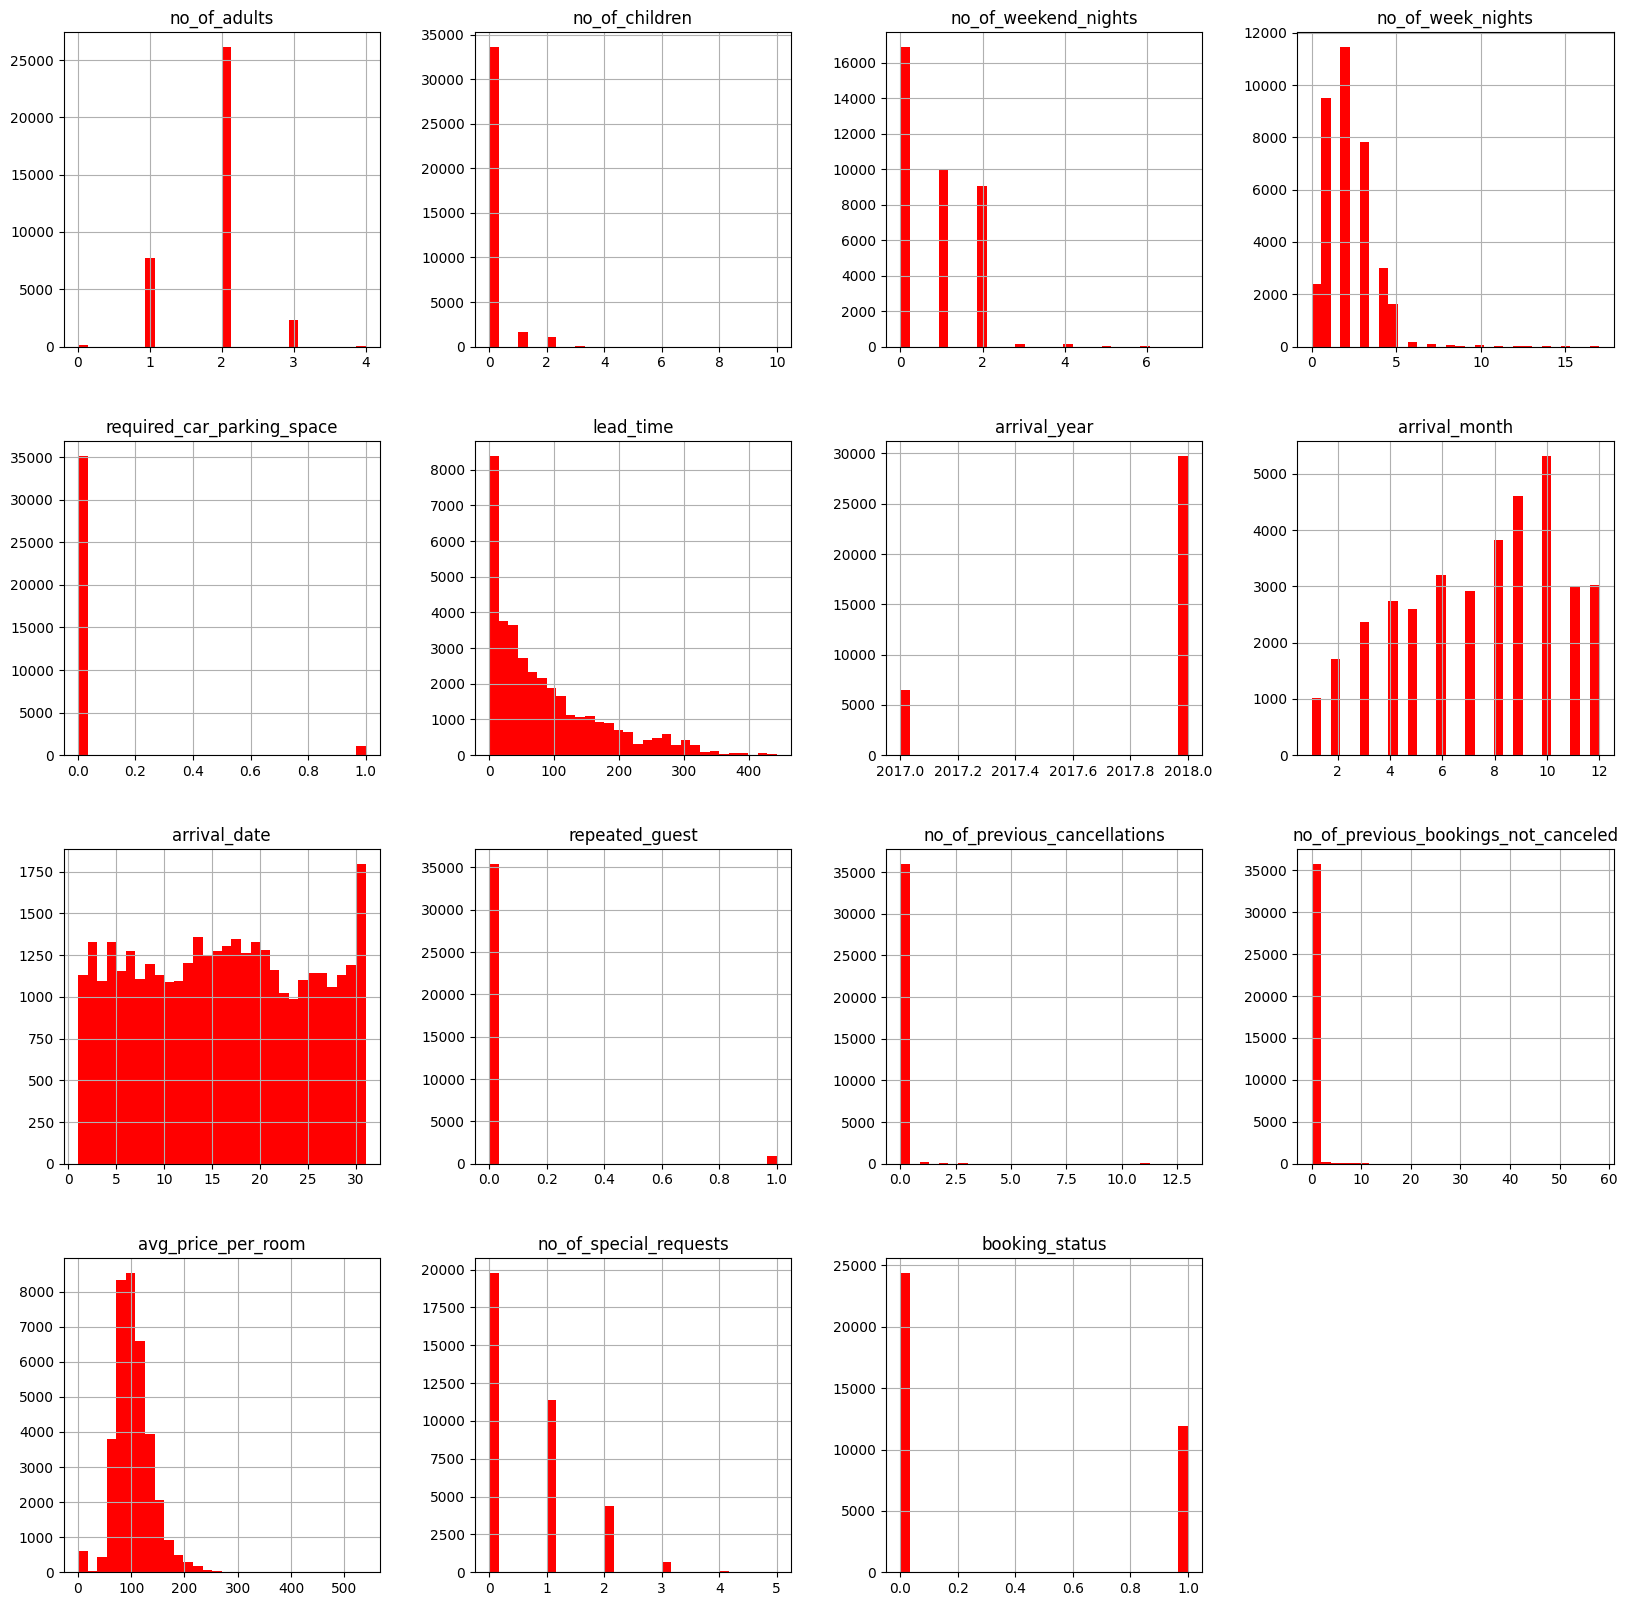

In [7]:
data.hist(bins = 30, figsize = (20,20), color = 'r')

In [8]:
df = data['lead_time']
z_scores = (df - df.mean()) / df.std()
data['lead_time'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_adults']
z_scores = (df - df.mean()) / df.std()
data['no_of_adults'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_children']
z_scores = (df - df.mean()) / df.std()
data['no_of_children'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_week_nights']
z_scores = (df - df.mean()) / df.std()
data['no_of_week_nights'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_weekend_nights']
z_scores = (df - df.mean()) / df.std()
data['no_of_weekend_nights'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_previous_cancellations']
z_scores = (df - df.mean()) / df.std()
data['no_of_previous_cancellations'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_previous_bookings_not_canceled']
z_scores = (df - df.mean()) / df.std()
data['no_of_previous_bookings_not_canceled'] = df[(np.abs(z_scores) < 3)]

df = data['avg_price_per_room']
z_scores = (df - df.mean()) / df.std()
data['avg_price_per_room'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_special_requests']
z_scores = (df - df.mean()) / df.std()
data['no_of_special_requests'] = df[(np.abs(z_scores) < 3)]

In [9]:
data = data.dropna()
data = data.reset_index(drop=True)
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2.0,0.0,1.0,2.0,Meal Plan 1,0,Room_Type 1,224.0,2017,10,2,Offline,0,0.0,0.0,65.00,0.0,0
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0,Room_Type 1,5.0,2018,11,6,Online,0,0.0,0.0,106.68,1.0,0
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0,Room_Type 1,1.0,2018,2,28,Online,0,0.0,0.0,60.00,0.0,1
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0,Room_Type 1,211.0,2018,5,20,Online,0,0.0,0.0,100.00,0.0,1
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0,Room_Type 1,48.0,2018,4,11,Online,0,0.0,0.0,94.50,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,INN36271,3.0,0.0,2.0,6.0,Meal Plan 1,0,Room_Type 4,85.0,2018,8,3,Online,0,0.0,0.0,167.80,1.0,0
33340,INN36272,2.0,0.0,1.0,3.0,Meal Plan 1,0,Room_Type 1,228.0,2018,10,17,Online,0,0.0,0.0,90.95,2.0,1
33341,INN36273,2.0,0.0,2.0,6.0,Meal Plan 1,0,Room_Type 1,148.0,2018,7,1,Online,0,0.0,0.0,98.39,2.0,0
33342,INN36274,2.0,0.0,0.0,3.0,Not Selected,0,Room_Type 1,63.0,2018,4,21,Online,0,0.0,0.0,94.50,0.0,1


<Axes: >

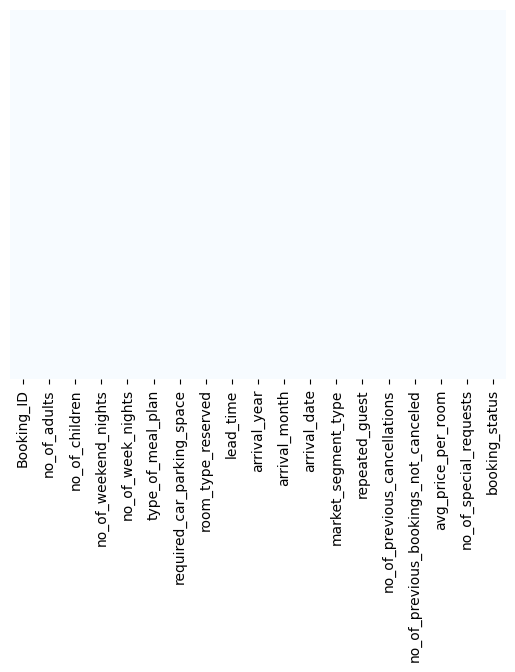

In [10]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<Axes: title={'center': 'no_of_adults'}>,
        <Axes: title={'center': 'no_of_children'}>,
        <Axes: title={'center': 'no_of_weekend_nights'}>,
        <Axes: title={'center': 'no_of_week_nights'}>],
       [<Axes: title={'center': 'required_car_parking_space'}>,
        <Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'arrival_year'}>,
        <Axes: title={'center': 'arrival_month'}>],
       [<Axes: title={'center': 'arrival_date'}>,
        <Axes: title={'center': 'repeated_guest'}>,
        <Axes: title={'center': 'no_of_previous_cancellations'}>,
        <Axes: title={'center': 'no_of_previous_bookings_not_canceled'}>],
       [<Axes: title={'center': 'avg_price_per_room'}>,
        <Axes: title={'center': 'no_of_special_requests'}>,
        <Axes: title={'center': 'booking_status'}>, <Axes: >]],
      dtype=object)

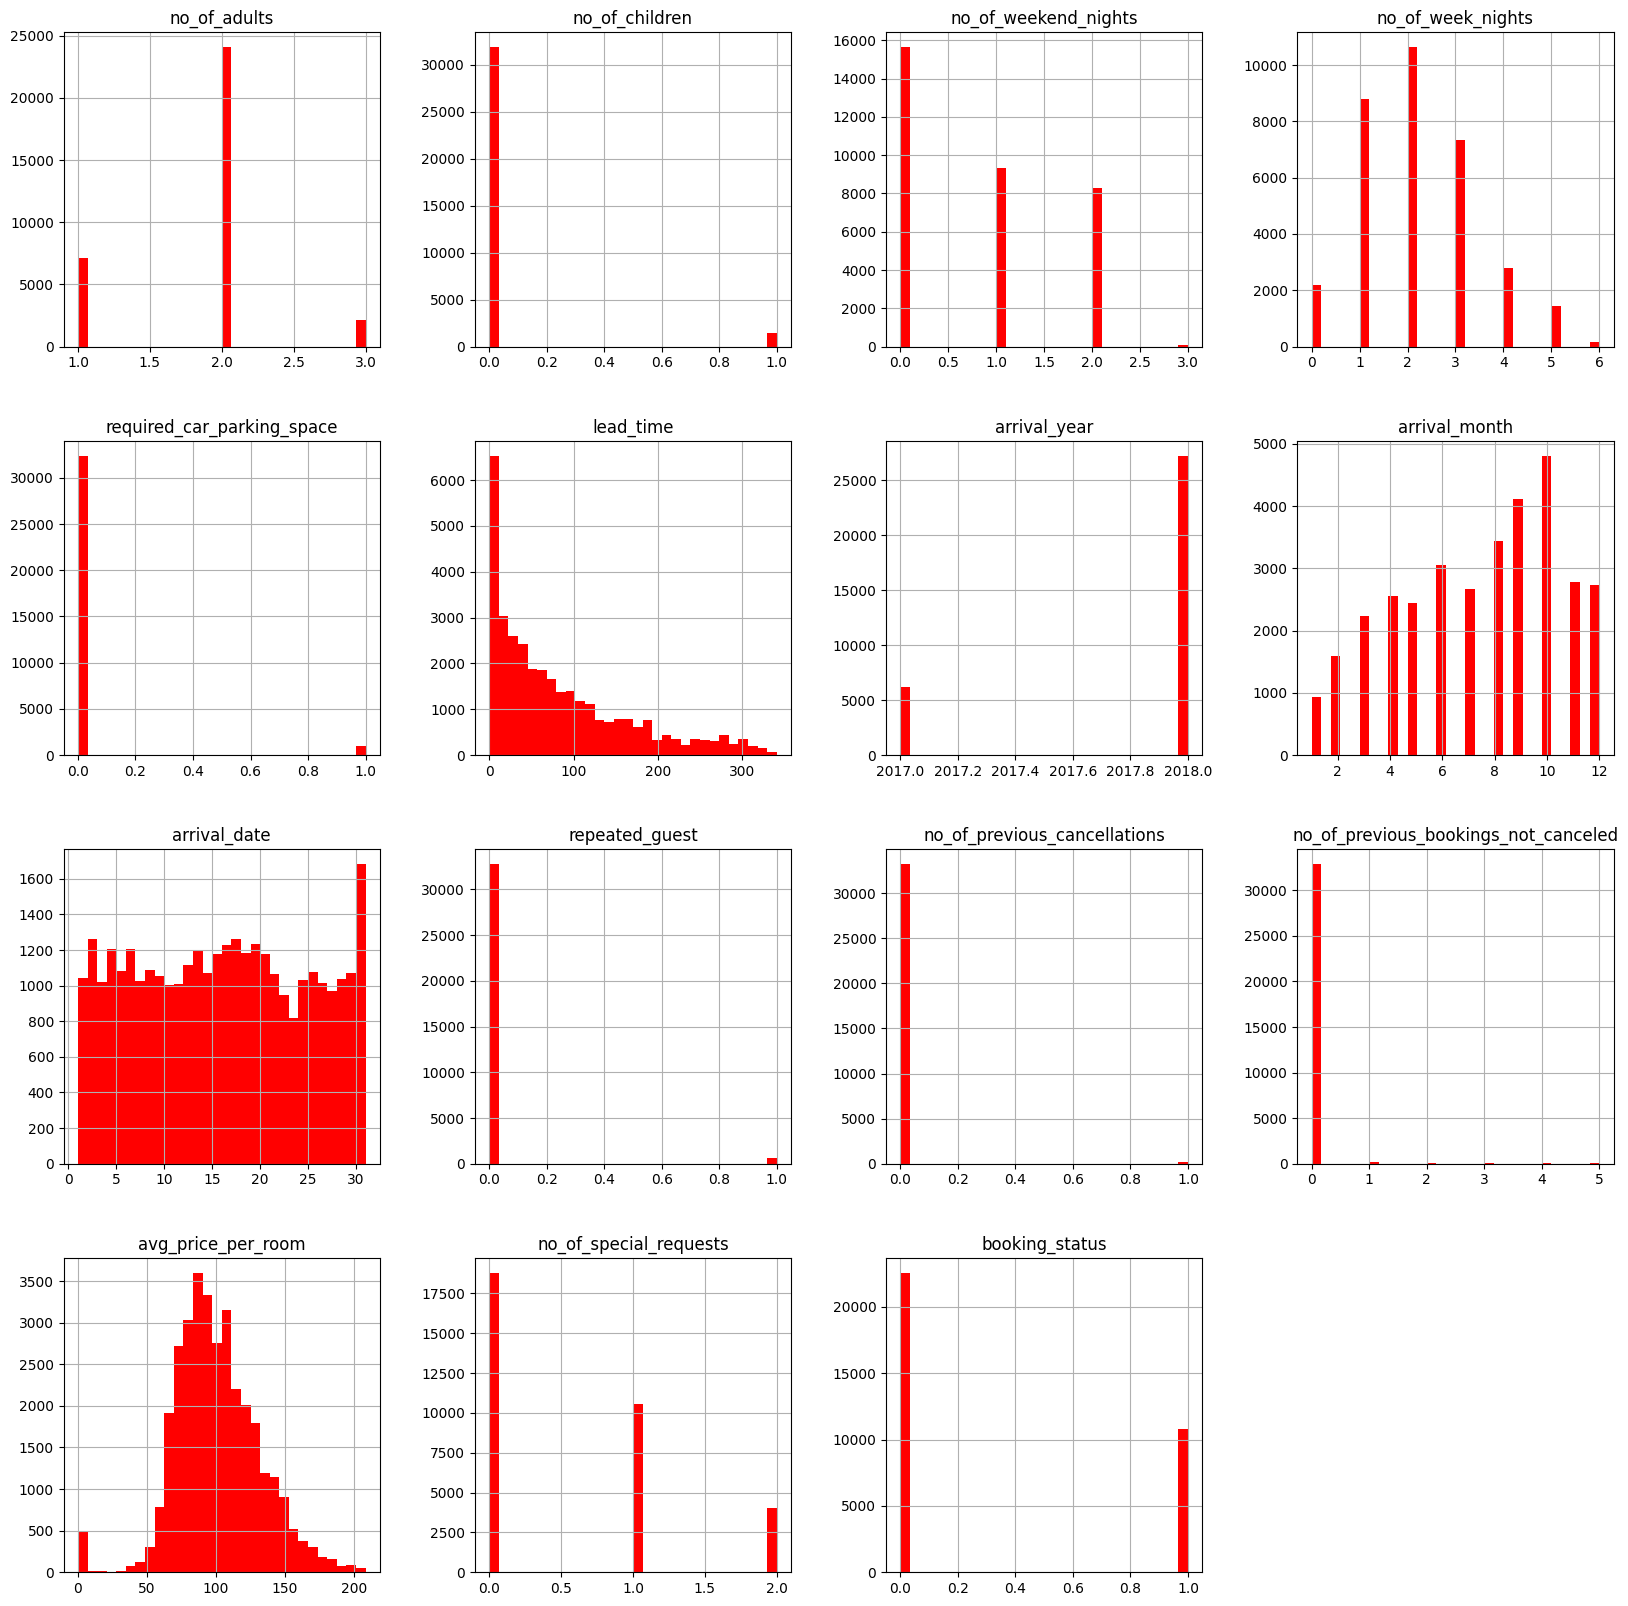

In [11]:
data.hist(bins = 30, figsize = (20,20), color = 'r')

In [12]:
data_int = data.select_dtypes(include=['int', 'float'])
data_int

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2.0,0.0,1.0,2.0,0,224.0,2017,10,2,0,0.0,0.0,65.00,0.0,0
1,2.0,0.0,2.0,3.0,0,5.0,2018,11,6,0,0.0,0.0,106.68,1.0,0
2,1.0,0.0,2.0,1.0,0,1.0,2018,2,28,0,0.0,0.0,60.00,0.0,1
3,2.0,0.0,0.0,2.0,0,211.0,2018,5,20,0,0.0,0.0,100.00,0.0,1
4,2.0,0.0,1.0,1.0,0,48.0,2018,4,11,0,0.0,0.0,94.50,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,3.0,0.0,2.0,6.0,0,85.0,2018,8,3,0,0.0,0.0,167.80,1.0,0
33340,2.0,0.0,1.0,3.0,0,228.0,2018,10,17,0,0.0,0.0,90.95,2.0,1
33341,2.0,0.0,2.0,6.0,0,148.0,2018,7,1,0,0.0,0.0,98.39,2.0,0
33342,2.0,0.0,0.0,3.0,0,63.0,2018,4,21,0,0.0,0.0,94.50,0.0,1


In [13]:
data_object = data.select_dtypes(include=['object'])
data_object = data_object.drop('Booking_ID', axis=1)
data_object

,type_of_meal_plan,room_type_reserved,market_segment_type
0,Meal Plan 1,Room_Type 1,Offline
1,Not Selected,Room_Type 1,Online
2,Meal Plan 1,Room_Type 1,Online
3,Meal Plan 1,Room_Type 1,Online
4,Not Selected,Room_Type 1,Online
...,...,...,...
33339,Meal Plan 1,Room_Type 4,Online
33340,Meal Plan 1,Room_Type 1,Online
33341,Meal Plan 1,Room_Type 1,Online
33342,Not Selected,Room_Type 1,Online


In [14]:
onehotencoder = OneHotEncoder()
data_object = onehotencoder.fit_transform(data_object).toarray()
data_object.shape

(33344, 16)

In [15]:
feature_names = onehotencoder.get_feature_names_out()

data_object_name = pd.DataFrame(data_object, columns = feature_names)
data_object_name

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33340,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33341,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33342,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
data_object_name[data_object_name == 0] = np.nan
data_object_name

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
33340,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
33341,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
33342,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [17]:
df_apriori = data_object_name.fillna(False)
df_apriori = df_apriori != False
df_apriori

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True
2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
33340,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
33341,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
33342,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True


In [18]:
from mlxtend.frequent_patterns import apriori

In [19]:
frequent_itemsets = apriori(df_apriori, min_support=0.15, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.764695,(type_of_meal_plan_Meal Plan 1)
1,0.801643,(room_type_reserved_Room_Type 1)
2,0.170465,(room_type_reserved_Room_Type 4)
3,0.304043,(market_segment_type_Offline)
4,0.629768,(market_segment_type_Online)
5,0.576296,"(type_of_meal_plan_Meal Plan 1, room_type_rese..."
6,0.162608,"(type_of_meal_plan_Meal Plan 1, room_type_rese..."
7,0.234705,"(type_of_meal_plan_Meal Plan 1, market_segment..."
8,0.465001,"(type_of_meal_plan_Meal Plan 1, market_segment..."
9,0.281490,"(market_segment_type_Offline, room_type_reserv..."


In [20]:
from mlxtend.frequent_patterns import association_rules
res = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(type_of_meal_plan_Meal Plan 1),(room_type_reserved_Room_Type 1),0.764695,0.801643,0.576296,0.753628,0.940103,-0.036717,0.805109,-0.213074
1,(room_type_reserved_Room_Type 1),(type_of_meal_plan_Meal Plan 1),0.801643,0.764695,0.576296,0.718893,0.940103,-0.036717,0.837063,-0.243114
2,(room_type_reserved_Room_Type 4),(type_of_meal_plan_Meal Plan 1),0.170465,0.764695,0.162608,0.953906,1.247432,0.032254,5.104855,0.239114
3,(market_segment_type_Offline),(type_of_meal_plan_Meal Plan 1),0.304043,0.764695,0.234705,0.771947,1.009483,0.002205,1.031799,0.013498
4,(market_segment_type_Online),(type_of_meal_plan_Meal Plan 1),0.629768,0.764695,0.465001,0.738368,0.965572,-0.016580,0.899374,-0.087846
5,(market_segment_type_Offline),(room_type_reserved_Room_Type 1),0.304043,0.801643,0.281490,0.925824,1.154907,0.037756,2.674120,0.192726
6,(market_segment_type_Online),(room_type_reserved_Room_Type 1),0.629768,0.801643,0.463802,0.736464,0.918692,-0.041048,0.752672,-0.192930
7,"(type_of_meal_plan_Meal Plan 1, market_segment...",(room_type_reserved_Room_Type 1),0.234705,0.801643,0.214731,0.914899,1.141279,0.026582,2.330838,0.161755
8,"(market_segment_type_Offline, room_type_reserv...",(type_of_meal_plan_Meal Plan 1),0.281490,0.764695,0.214731,0.762838,0.997572,-0.000523,0.992170,-0.003377
9,(market_segment_type_Offline),"(type_of_meal_plan_Meal Plan 1, room_type_rese...",0.304043,0.576296,0.214731,0.706254,1.225506,0.039513,1.442416,0.264399


In [21]:
res1 = res[['antecedents','consequents','support','confidence','lift']]
res1

,antecedents,consequents,support,confidence,lift
0,(type_of_meal_plan_Meal Plan 1),(room_type_reserved_Room_Type 1),0.576296,0.753628,0.940103
1,(room_type_reserved_Room_Type 1),(type_of_meal_plan_Meal Plan 1),0.576296,0.718893,0.940103
2,(room_type_reserved_Room_Type 4),(type_of_meal_plan_Meal Plan 1),0.162608,0.953906,1.247432
3,(market_segment_type_Offline),(type_of_meal_plan_Meal Plan 1),0.234705,0.771947,1.009483
4,(market_segment_type_Online),(type_of_meal_plan_Meal Plan 1),0.465001,0.738368,0.965572
5,(market_segment_type_Offline),(room_type_reserved_Room_Type 1),0.281490,0.925824,1.154907
6,(market_segment_type_Online),(room_type_reserved_Room_Type 1),0.463802,0.736464,0.918692
7,"(type_of_meal_plan_Meal Plan 1, market_segment...",(room_type_reserved_Room_Type 1),0.214731,0.914899,1.141279
8,"(market_segment_type_Offline, room_type_reserv...",(type_of_meal_plan_Meal Plan 1),0.214731,0.762838,0.997572
9,(market_segment_type_Offline),"(type_of_meal_plan_Meal Plan 1, room_type_rese...",0.214731,0.706254,1.225506
